In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [ ]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images to a 1D array (28*28 = 784 pixels)
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))


In [ ]:
def resize_images(images):
    return images.reshape((images.shape[0], 28, 28))

train_images_28x28 = resize_images(train_images)
test_images_28x28 = resize_images(test_images)


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    keras.layers.Dense(32, activation='sigmoid'),   # Fully connected layer with 128 units
    keras.layers.Dropout(0.2), # Dropout layer to prevent overfitting
    keras.layers.Dense(32, activation='sigmoid'),   # Fully connected layer with 128 units
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units (digits 0-9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trai

In [ ]:
# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images_28x28, train_labels, test_size=0.2, random_state=42)

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images_28x28, test_labels)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 1.0931 - accuracy: 0.6825 - val_loss: 0.4398 - val_accuracy: 0.8932
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4958 - accuracy: 0.8598 - val_loss: 0.3043 - val_accuracy: 0.9164
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4101 - accuracy: 0.8810 - val_loss: 0.2655 - val_accuracy: 0.9238
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3678 - accuracy: 0.8916 - val_loss: 0.2422 - val_accuracy: 0.9283
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3403 - accuracy: 0.9004 - val_loss: 0.2236 - val_accuracy: 0.9330
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3151 - accuracy: 0.9089 - val_loss: 0.2118 - val_accuracy: 0.9362
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3007 - accuracy: 0.9118 - val_loss: 0.1963 - val_accuracy:

In [ ]:
# Assuming you have loaded the MNIST test set earlier
test_images, test_labels = mnist.load_data()[1]

# Preprocess the test images
test_images = test_images / 255.0
test_images_reshaped = test_images.reshape((test_images.shape[0], 28, 28))  # Reshape to (None, 28, 28)

# Make predictions
predictions = model.predict(test_images_reshaped)


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == test_labels)
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.9482


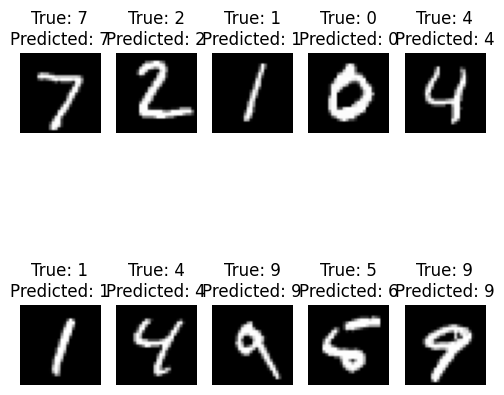

In [ ]:
import matplotlib.pyplot as plt

# Function to display images along with their predictions
def plot_images(images, labels, predictions, num_images=10):
    plt.figure(figsize=(6, 6))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {labels[i]}\nPredicted: {predictions[i]}')
        plt.axis('off')
    plt.show()

# Plot a few examples
plot_images(test_images, test_labels, predicted_labels)


In [ ]:
model.save('digit_recognition_model.h5')
